# 드라이브연결

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 데이터 가져오기

In [7]:
import pandas as pd
import numpy as np

In [8]:
data_path = '/content/drive/MyDrive/빅프로젝트/코드/추천시스템'

# owner_data = pd.read_csv(data_path+'/data_owner2.csv', encoding='cp949')
user_data = pd.read_csv(data_path +'/user_df.csv')

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num                    2393 non-null   int64  
 1   category               2393 non-null   int64  
 2   T                      2393 non-null   float64
 3   car_type               2393 non-null   int64  
 4   is_freezer             2393 non-null   int64  
 5   vibration-free         2393 non-null   int64  
 6   transport_type         2393 non-null   int64  
 7   Departure_latitude     2393 non-null   float64
 8   Departure_longitude    2393 non-null   float64
 9   Destination_latitude   2393 non-null   float64
 10  Destination_longitude  2393 non-null   float64
 11  Departure              2393 non-null   object 
 12  Destination            2393 non-null   object 
dtypes: float64(5), int64(6), object(2)
memory usage: 243.2+ KB


# 데이터 전처리 및 범주화

In [10]:
# 제주는 사용 안하기에 제거
user_data = user_data.drop(user_data.loc[user_data['Destination'].str.contains('제주')].index)
user_data = user_data.drop(user_data.loc[user_data['Departure'].str.contains('제주')].index)

In [12]:
# car_type은 겹치는 값이기에 제거
new_user_data = user_data.drop('car_type', axis=1)
new_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2392
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num                    2277 non-null   int64  
 1   category               2277 non-null   int64  
 2   T                      2277 non-null   float64
 3   is_freezer             2277 non-null   int64  
 4   vibration-free         2277 non-null   int64  
 5   transport_type         2277 non-null   int64  
 6   Departure_latitude     2277 non-null   float64
 7   Departure_longitude    2277 non-null   float64
 8   Destination_latitude   2277 non-null   float64
 9   Destination_longitude  2277 non-null   float64
 10  Departure              2277 non-null   object 
 11  Destination            2277 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 231.3+ KB


In [13]:
new_user_data.describe()

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude
count,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,71432.790953,3.729029,7.758278,0.066315,1.959596,0.327185,36.398252,127.758050,36.628784,127.708254
std,15879.159018,1.851448,7.560302,0.248887,0.196948,0.469288,1.068557,0.906886,1.039999,0.884581
min,46640.000000,1.000000,1.000000,0.000000,1.000000,0.000000,34.316731,125.953438,34.316731,126.167242
25%,58875.000000,3.000000,2.500000,0.000000,2.000000,0.000000,35.308842,126.958359,35.489284,127.047577
50%,71447.000000,3.000000,5.000000,0.000000,2.000000,0.000000,36.444379,127.454483,37.205510,127.273675
75%,83167.000000,5.000000,11.000000,0.000000,2.000000,1.000000,37.435067,128.672100,37.495557,128.608900
max,105695.000000,8.000000,25.000000,1.000000,2.000000,1.000000,38.436282,129.439322,38.446235,129.546148


In [14]:
drop_cols = ['num', 'Departure', 'Destination']
new_user_data = new_user_data.drop(drop_cols, axis=1)
new_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2392
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               2277 non-null   int64  
 1   T                      2277 non-null   float64
 2   is_freezer             2277 non-null   int64  
 3   vibration-free         2277 non-null   int64  
 4   transport_type         2277 non-null   int64  
 5   Departure_latitude     2277 non-null   float64
 6   Departure_longitude    2277 non-null   float64
 7   Destination_latitude   2277 non-null   float64
 8   Destination_longitude  2277 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 177.9 KB


In [15]:
new_user_data.head()

,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude
0,3,5.0,0,2,0,36.904159,126.699458,36.281500,127.377800
1,3,25.0,0,2,0,37.910276,127.781058,35.186980,128.989962
2,5,5.0,0,2,0,36.303951,127.337361,37.475161,126.618491
3,1,2.5,1,2,0,36.993408,127.435584,37.009900,127.259400
4,1,5.0,0,2,0,36.576600,128.700763,37.495557,127.121786


In [16]:
new_user_data['T'].value_counts()

5.0     651
2.5     632
11.0    345
25.0    317
1.0     118
1.4     109
8.0     105
Name: T, dtype: int64

### 범주화

In [17]:
dummy_cols = ['category', 'is_freezer', 'vibration-free', 'transport_type']

new_user_data_dum = pd.get_dummies(new_user_data, columns=dummy_cols, drop_first=True)

In [19]:
new_user_data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2392
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   T                      2277 non-null   float64
 1   Departure_latitude     2277 non-null   float64
 2   Departure_longitude    2277 non-null   float64
 3   Destination_latitude   2277 non-null   float64
 4   Destination_longitude  2277 non-null   float64
 5   category_2             2277 non-null   uint8  
 6   category_3             2277 non-null   uint8  
 7   category_4             2277 non-null   uint8  
 8   category_5             2277 non-null   uint8  
 9   category_6             2277 non-null   uint8  
 10  category_7             2277 non-null   uint8  
 11  category_8             2277 non-null   uint8  
 12  is_freezer_1           2277 non-null   uint8  
 13  vibration-free_2       2277 non-null   uint8  
 14  transport_type_1       2277 non-null   uint8  
dtypes: f

In [20]:
new_user_data_dum.head()

,T,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,category_2,category_3,category_4,category_5,category_6,category_7,category_8,is_freezer_1,vibration-free_2,transport_type_1
0,5.0,36.904159,126.699458,36.281500,127.377800,0,1,0,0,0,0,0,0,1,0
1,25.0,37.910276,127.781058,35.186980,128.989962,0,1,0,0,0,0,0,0,1,0
2,5.0,36.303951,127.337361,37.475161,126.618491,0,0,0,1,0,0,0,0,1,0
3,2.5,36.993408,127.435584,37.009900,127.259400,0,0,0,0,0,0,0,1,1,0
4,5.0,36.576600,128.700763,37.495557,127.121786,0,0,0,0,0,0,0,0,1,0


# kmeans하고 나서 차원축소

#### kmeans

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=42, n_init="auto")
result = kmeans.fit(new_user_data_dum)

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # new_user_data 데이터프레임, clusters는 KMeans 군집 결과

# # 군집 정보를 데이터프레임에 추가
# new_user_data_dum['Cluster'] = kmeans.labels_

# # Pair Plot 그리기
# sns.set(style="ticks")
# sns.pairplot(new_user_data_dum, hue="Cluster", markers=["o", "s", "D"], palette="husl")
# plt.show()


#### 차원 축소

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(new_user_data_dum)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

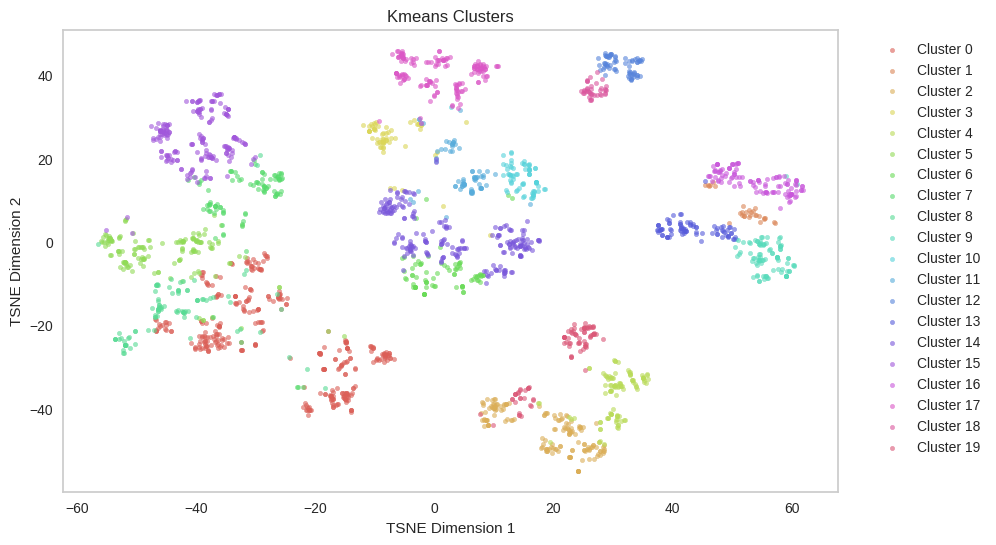

In [28]:
import seaborn as sns

labels = result.labels_

# 데이터프레임에 레이블 추가
X_reduced_tsne_labeled = np.column_stack([X_reduced_tsne, labels])

# 군집 별로 데이터 분리
cluster_data = [X_reduced_tsne_labeled[X_reduced_tsne_labeled[:, -1] == cluster] for cluster in range(len(set(labels)))]

# 색상 팔레트 설정 (필요한 만큼의 색상을 생성)
palette = sns.color_palette("hls", len(cluster_data))

# 각 군집별 그래프 그리기
plt.figure(figsize=(10, 6))
for cluster, data in enumerate(cluster_data):
    plt.scatter(data[:, 0], data[:, 1], color=palette[cluster], alpha=0.6, s=10, label=f'Cluster {cluster}')

plt.title('Kmeans Clusters')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(False)
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# 예시 데이터와 군집 레이블
data = new_user_data_dum  # 여기에는 군집화된 데이터가 들어갑니다.
labels = result.labels_  # 각 데이터 포인트의 군집 레이블이 들어갑니다.

# 실루엣 계수 계산
silhouette_avg = silhouette_score(data, labels)

print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.26147493633327995


In [ ]:
for i in set(labels):
    print(i, ": ", len(new_user_data[labels==i]), "개")

0 :  332 개
1 :  29 개
2 :  155 개
3 :  62 개
4 :  100 개
5 :  146 개
6 :  80 개
7 :  94 개
8 :  98 개
9 :  95 개
10 :  72 개
11 :  71 개
12 :  67 개
13 :  82 개
14 :  216 개
15 :  189 개
16 :  111 개
17 :  150 개
18 :  38 개
19 :  90 개


# T-SNE로 차원축소 후 DBSCAN 군집

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(new_user_data_dum)


In [62]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=7)
dbscan_result = dbscan.fit(X_reduced_tsne)

dbscan.labels_[:10]
len(dbscan.core_sample_indices_)
dbscan.components_[:3]

array([[-6.9160194, 11.313446 ],
       [61.15088  , 11.24019  ],
       [13.898037 ,  1.9832045]], dtype=float32)

In [63]:
len(set(dbscan.labels_))

17

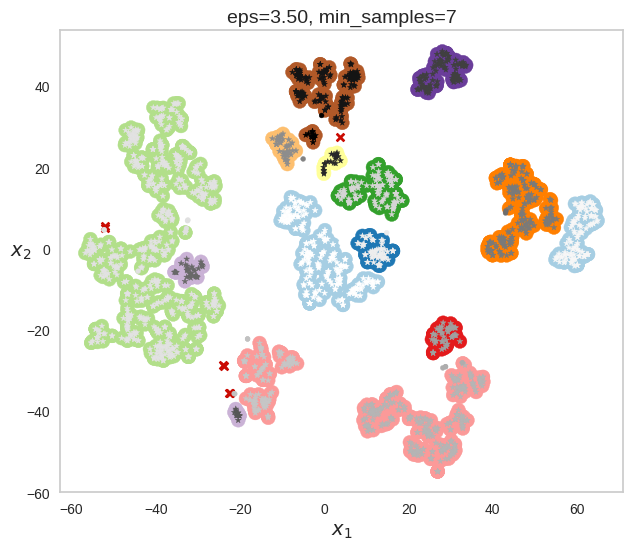

In [75]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1

    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies_mask = dbscan.labels_ == -1
    anomalies = X[anomalies_mask]
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=30)
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=30)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_dbscan(dbscan, np.array(pd.DataFrame(X_reduced_tsne).iloc[:,[0,1]]), size=100)
plt.grid(False)

plt.show()

In [66]:
from sklearn.metrics import silhouette_score

# 예시 데이터와 군집 레이블
data = new_user_data_dum  # 여기에는 군집화된 데이터가 들어갑니다.
labels = dbscan_result.labels_  # 각 데이터 포인트의 군집 레이블이 들어갑니다.

# 실루엣 계수 계산
silhouette_avg = silhouette_score(data, labels)

print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.09679110523284772


### 모델저장

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/빅프로젝트/코드/추천시스템'

# 모델을 파일에 저장
with open(file_path+'/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


In [ ]:
# 저장된 모델 불러오기
file_path = '/content/drive/MyDrive/빅프로젝트/코드/추천시스템'

with open(file_path+'/kmeans_model.pkl', 'rb') as file:
    kmeans = pickle.load(file)


# 화주데이터 넣기

In [ ]:
new_customers1 = pd.read_csv(data_path+'/company.csv', encoding='cp949')
new_customers1.head()

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,1,3,25.0,0,2,0,37.814105,126.866859,37.349301,126.746051,경기도 파주시 광탄면 방축리 190번지,경기도 시흥시 정왕동
1,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
2,3,5,8.0,0,2,1,37.303771,127.649988,35.186776,126.921600,경기도 여주시 천송동 497-3번지,광주광역시 북구 문흥동
3,4,3,25.0,0,2,0,37.320491,126.728320,37.495557,127.121786,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,서울특별시 송파구 가락동
4,5,3,2.5,0,2,0,36.589369,127.395426,37.534700,126.906500,충청북도 청주시 흥덕구 현암동 19-6번지,서울특별시 영등포구 당산


In [ ]:
new_customers1.rename(columns={'vibration_free': 'vibration-free'}, inplace=True)

In [ ]:
new_customers1.head()

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,1,3,25.0,0,2,0,37.814105,126.866859,37.349301,126.746051,경기도 파주시 광탄면 방축리 190번지,경기도 시흥시 정왕동
1,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
2,3,5,8.0,0,2,1,37.303771,127.649988,35.186776,126.921600,경기도 여주시 천송동 497-3번지,광주광역시 북구 문흥동
3,4,3,25.0,0,2,0,37.320491,126.728320,37.495557,127.121786,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,서울특별시 송파구 가락동
4,5,3,2.5,0,2,0,36.589369,127.395426,37.534700,126.906500,충청북도 청주시 흥덕구 현암동 19-6번지,서울특별시 영등포구 당산


In [ ]:
# 한글데이터 제거
drop_cols = ['Departure', 'Destination']
new_customers = new_customers1.drop(drop_cols, axis=1)
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num                    18819 non-null  int64  
 1   category               18819 non-null  int64  
 2   T                      18819 non-null  float64
 3   is_freezer             18819 non-null  int64  
 4   vibration-free         18819 non-null  int64  
 5   transport_type         18819 non-null  int64  
 6   Departure_latitude     18819 non-null  float64
 7   Departure_longitude    18819 non-null  float64
 8   Destination_latitude   18819 non-null  float64
 9   Destination_longitude  18819 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.4 MB


In [ ]:
new_customers.shape

(18819, 10)

## 화주데이터 kmeans 적용을 위한 데이터 shape 바꾸기

In [ ]:
# 화주
new_driver_dum = pd.DataFrame(columns=new_user_data_dum.columns)
customer_clusters = [[] for _ in range(len(set(kmeans.labels_)))]

new_customers_dict = new_customers.to_dict()

for i in range(len(new_customers)):
    row = {key: value[i] for key, value in new_customers_dict.items()}

    # 범주 데이터 형식으로 바꾸기
    for i in new_user_data_dum.columns.intersection(new_customers.columns):
        new_driver_dum[i] = row[i]

    new_driver_dum['is_freezer_1'] = [1 if row['is_freezer'] == 1 else 0]
    new_driver_dum['vibration-free_2'] = [1 if row['vibration-free'] == 2 else 0]
    new_driver_dum['transport_type_1'] = [1 if row['transport_type'] == 1 else 0]

    if row['category'] == 1:
        for i in range(2,9):
            new_driver_dum[f'category_{i}'] = 0
    else:
        new = row['category']
        new_driver_dum[f'category_{new}'] = 1
        new_driver_dum.fillna(0, inplace=True)

    cluster_label = kmeans.predict(new_driver_dum)

    # 해당 군집에 새롭게 화주를 추가합니다.
    customer_clusters[cluster_label[0]].append(row['num'])

In [ ]:
new_driver_dum

,T,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,category_2,category_3,category_4,category_5,category_6,category_7,category_8,is_freezer_1,vibration-free_2,transport_type_1
0,25.0,35.843531,128.784826,38.249708,127.421284,0,1,1,0,0,0,0,0,1,0


In [ ]:
for i,j in enumerate(customer_clusters):
    print('cluster_label',i,' : ' ,j)
    print(len(j))

cluster_label 0  :  [5, 9, 19, 28, 32, 45, 57, 59, 62, 63, 64, 76, 94, 108, 112, 122, 124, 129, 136, 161, 173, 199, 202, 212, 213, 220, 221, 232, 236, 242, 247, 256, 267, 270, 273, 290, 291, 296, 299, 303, 305, 312, 313, 327, 330, 339, 340, 342, 348, 349, 357, 363, 378, 380, 397, 407, 408, 416, 421, 433, 434, 435, 441, 443, 450, 451, 456, 460, 462, 464, 465, 468, 489, 497, 499, 523, 525, 541, 545, 546, 549, 552, 555, 563, 566, 575, 583, 600, 601, 609, 622, 625, 626, 627, 628, 629, 638, 640, 642, 645, 649, 650, 651, 656, 661, 668, 671, 688, 689, 704, 715, 717, 729, 738, 744, 754, 757, 778, 783, 807, 825, 829, 832, 835, 840, 857, 858, 864, 866, 871, 886, 888, 898, 900, 901, 903, 905, 907, 909, 911, 921, 932, 934, 935, 959, 969, 991, 993, 1002, 1003, 1011, 1021, 1026, 1035, 1037, 1039, 1043, 1046, 1048, 1053, 1055, 1057, 1059, 1064, 1069, 1073, 1076, 1079, 1081, 1093, 1095, 1097, 1109, 1112, 1121, 1131, 1133, 1135, 1142, 1144, 1147, 1148, 1152, 1153, 1175, 1178, 1187, 1192, 1201, 1210, 12

# 신규 차주 추천방법

### 차주데이터 범주화

In [ ]:
new_driver_features = {
    'num': 3000,
    'category' : 3,
    'T' : 5.0,
    'is_freezer' : 0,
    'vibration-free' : 2,
    'transport_type' : 0,
    'Departure_latitude' : 37.497063718531,
    'Departure_longitude' : 127.12208802459,
    'Destination_latitude' : 36.3297322,
    'Destination_longitude' : 127.4281445,
    'Departure': '서울특별시 송파구 가락동',
    'Destination': '대전광역시 중구 은행동',
    'distance':1 #장거리
}

new_driver = pd.DataFrame([new_driver_features])

driver = new_driver.drop(['num','Departure','Destination'],axis=1)

# 범주 데이터 형식으로 바꾸기
for i in new_user_data_dum.columns.intersection(driver.columns):
    new_driver_dum[i] = driver[i]

new_driver_dum['is_freezer_1'] = [1 if new_driver_features['is_freezer'] == 1 else 0]
new_driver_dum['vibration-free_2'] = [1 if new_driver_features['vibration-free'] == 2 else 0]
new_driver_dum['transport_type_1'] = [1 if new_driver_features['transport_type'] == 1 else 0]

if new_driver_features['category'] == 1:
    for i in range(2,9):
        new_driver_dum[f'category_{i}'] = 0
else:
    new = new_driver_features['category']
    new_driver_dum[f'category_{new}'] = 1
    new_driver_dum.fillna(0, inplace=True)

new_driver_dum
cluster_label = kmeans.predict(new_driver_dum)
print(cluster_label)

[14]


In [ ]:
new_customers

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude
0,1,3,25.0,0,2,0,37.814105,126.866859,37.349301,126.746051
1,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969
2,3,5,8.0,0,2,1,37.303771,127.649988,35.186776,126.921600
3,4,3,25.0,0,2,0,37.320491,126.728320,37.495557,127.121786
4,5,3,2.5,0,2,0,36.589369,127.395426,37.534700,126.906500
...,...,...,...,...,...,...,...,...,...,...
18814,19996,3,5.0,0,2,1,35.845245,126.880658,37.495557,127.121786
18815,19997,3,11.0,0,2,0,37.777059,127.241123,37.518394,126.737573
18816,19998,3,1.4,1,2,0,37.219241,126.855075,35.142542,129.071319
18817,19999,4,8.0,0,2,0,37.314786,127.234982,37.006217,127.269800


In [ ]:
df = pd.DataFrame()

for i in customer_clusters[14]:
    temp_df = new_customers1[new_customers1['num'] == i]
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
df

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...
991,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동
992,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동
993,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법
994,19914,3,5.0,0,2,0,37.911660,127.031693,37.495557,127.121786,경기도 동두천시 상패동 435번지,서울특별시 송파구 가락동


In [ ]:
df_f = df.loc[(df['is_freezer']==new_driver['is_freezer'].values[0]) & (df['T']==new_driver['T'].values[0])]
df_f

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...
990,19869,3,5.0,0,2,1,37.690502,127.328021,37.453541,126.903263,경기도 남양주시 수동면 송천리 425-3번지,서울특별시 금천구 시흥동
991,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동
992,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동
993,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법


In [ ]:
len(df_f)

957

In [ ]:
df_f = df.loc[(df['is_freezer']==new_driver['is_freezer'].values[0]) & (df['T']==new_driver['T'].values[0]) & (df['vibration-free']==new_driver['vibration-free'].values[0])]
df_f

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...
990,19869,3,5.0,0,2,1,37.690502,127.328021,37.453541,126.903263,경기도 남양주시 수동면 송천리 425-3번지,서울특별시 금천구 시흥동
991,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동
992,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동
993,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법


In [ ]:
len(df_f)

917

In [ ]:
df_f = df.loc[(df['is_freezer']==new_driver['is_freezer'].values[0]) & (df['T']==new_driver['T'].values[0]) & (df['vibration-free']==new_driver['vibration-free'].values[0]) & (df['transport_type']==new_driver['transport_type'].values[0])]
df_f

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
5,38,3,5.0,0,2,0,36.934493,127.184698,37.487426,126.927075,충청남도 천안시 서북구 입장면 흑암리 75-1,서울특별시 관악구 신림동
...,...,...,...,...,...,...,...,...,...,...,...,...
988,19835,3,5.0,0,2,0,36.167462,127.435018,37.244900,126.980600,충청남도 금산군 추부면 용지리 577번지,경기도 수원시 권선구 고색동
989,19855,3,5.0,0,2,0,37.175463,126.889804,37.495484,127.033357,경기도 화성시 팔탄면 창곡리 1020번지,서울특별시 강남구 역삼동
991,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동
993,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법


# 현재 차주 위치

In [ ]:
# 경기도 성남시 분당구 정자동 153
# 37.360343510097, 127.11000482191

In [ ]:
!pip install haversine

In [ ]:
# 현재위치에서 출발지까지의 거리함수

from haversine import haversine

def calculate_haversine_distance(df, start_lat_col, start_lon_col, current_lat_col, current_lon_col):

    # Apply haversine function to each row
    distances = df.apply(lambda row: haversine((row[start_lat_col], row[start_lon_col]),
                                               (current_lat_col, current_lon_col)), axis=1)
    return distances

# 위에서 정의한 함수를 사용하여 haversine 거리 계산
df_f['Haversine_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 37.360343510097, 127.11000482191)



def calculate_haversine_distance(df, start_lat_col, start_lon_col, current_lat_col, current_lon_col):

    # Apply haversine function to each row
    distances = df.apply(lambda row: haversine((row[start_lat_col], row[start_lon_col]),
                                               (row[current_lat_col], row[current_lon_col])), axis=1)
    return distances

# 위에서 정의한 함수를 사용하여 haversine 거리 계산
df_f['differ_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 'Destination_latitude', 'Destination_longitude')


# 결과 확인
df_f

<ipython-input-562-1ba604a96124>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Haversine_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 37.360343510097, 127.11000482191)
<ipython-input-562-1ba604a96124>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['differ_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 'Destination_latitude', 'Destination_longitude')


,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination,Haversine_Distance,differ_Distance
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동,8.707023,23.034173
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동,32.723897,48.391266
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동,50.576344,42.279622
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동,56.866203,50.258815
5,38,3,5.0,0,2,0,36.934493,127.184698,37.487426,126.927075,충청남도 천안시 서북구 입장면 흑암리 75-1,서울특별시 관악구 신림동,47.812975,65.579670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,19835,3,5.0,0,2,0,36.167462,127.435018,37.244900,126.980600,충청남도 금산군 추부면 용지리 577번지,경기도 수원시 권선구 고색동,135.765124,126.468669
989,19855,3,5.0,0,2,0,37.175463,126.889804,37.495484,127.033357,경기도 화성시 팔탄면 창곡리 1020번지,서울특별시 강남구 역삼동,28.325122,37.780301
991,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동,101.971424,117.041398
993,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법,54.719281,78.999038


In [ ]:
# 장거리 단거리 취향 존중
if new_driver_features['distance']==1:
    df_f = df_f[df_f['differ_Distance']>=90]
else:
    df_f = df_f[df_f['differ_Distance']<90]

In [ ]:
df_f = df_f.sort_values('Haversine_Distance')
df_f[:10]

,num,category,T,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination,Haversine_Distance,differ_Distance
398,7666,3,5.0,0,2,0,37.331736,127.187669,36.315742,127.318538,경기도 용인시 처인구 모현읍 동림리 307-1번지 (주)서안,대전광역시 유성구 대정,7.566555,113.572402
288,5235,3,5.0,0,2,0,37.427948,127.150232,36.353965,126.579662,경기도 성남시 중원구 하대원동 155-26번지,충청남도 보령시 대천,8.314995,129.753759
495,9542,3,5.0,0,2,0,37.395625,127.211265,36.315742,127.318538,경기도 광주시 태전동 477-8번지,대전광역시 유성구 대정,9.769774,120.456362
201,3646,4,5.0,0,2,0,37.262417,127.138312,35.853657,127.106313,경기도 용인시 기흥구 상하동 620-8번지,전라북도 전주시 덕진구 팔복동,11.172977,156.673305
955,19128,3,5.0,0,2,0,37.355599,126.966926,37.637422,128.553141,경기도 의왕시 오전동 196-5 번지 B층 220호,강원도 평창군 진부면,12.656962,143.401558
696,14148,3,5.0,0,2,0,37.396795,126.973262,38.249708,127.421284,경기도 안양시 동안구 관양동 906-1번지 디지털 엠파이어(A동) 1303호,강원도 철원군 김화읍,12.744367,102.679253
924,18427,3,5.0,0,2,0,37.392208,126.958951,36.315742,127.318538,경기도 안양시 동안구 관양동 1591-9번지 경기지식산업안양센터 903호,대전광역시 유성구 대정,13.809789,123.899488
67,1353,3,5.0,0,2,0,37.349996,126.948949,37.713607,128.186153,"경기도 군포시 당동 159-1번지 1층 일부,2층일부",강원도 홍천군 서석면,14.281761,116.345852
242,4459,3,5.0,0,2,0,37.390047,126.936005,36.246254,127.619408,경기도 안양시 만안구 안양동 196번지 유천팩토피아 1동 B2층 213,충청북도 옥천군 이원면,15.726127,140.983139
290,5267,3,5.0,0,2,0,37.536886,127.049451,35.958517,126.548051,서울특별시 성동구 성수동1가 367번지,전라북도 군산시 오식도,20.345456,181.102389


- 하루에 한번 새로생성된 차주기록들을 군집에 넣고 모델링하여 업데이트하기

- 나중에 개인의 기록이 많이 쌓였을 때 개인에게 맞는 최적화 추천시스템으로 넘어가기